# Overview

## References

* [NetworkX Tutorial](https://networkx.org/documentation/stable/tutorial.html#tutorial)

## Terminologies

### Degree

Number of edges of a node.


## Node

What can be the node/vertex in a graph?

* [Creating a graph](https://networkx.org/documentation/stable/tutorial.html#creating-a-graph)

> In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc. Python's None object is not allowed

### Node can be another graph

> The graph G contains H as a node. **This flexibility allows graphs of graphs, graphs of files, graphs of functions** and much more.
> ```
> H = nx.path_graph(10)
> G.add_node(H)
> ```



# Prerequisites

* [PyGraphviz install](https://pygraphviz.github.io/documentation/stable/install.html)

> PyGraphviz requires:
> * Python (version 3.8, 3.9, or 3.10)
> * Graphviz (version 2.42 or later)
> * C/C++ Compiler

In [1]:
# !brew install graphviz  # for mac
!pip install networkx pygraphviz --quiet

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Undirected Graph Operations

## Creation

In [60]:
UG = nx.Graph()

# Nodes
UG.add_nodes_from([1,2,3])
UG.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
    ("spam", {"color": "na"}),
])

# Edges
UG.add_edges_from([(1, 2), (1, 3), (1, "spam"), (2, 4), (3, 5)])

## Visualise

* [draw_networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)
* [Graph Layout](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)
* [draw_networkx_edge_labels](https://networkx.org/documentation/stable//reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html)
* [NetworkX gallery](https://networkx.org/documentation/latest/auto_examples/index.html)

> General-purpose and introductory examples for NetworkX. The tutorial introduces conventions and basic graph manipulations.

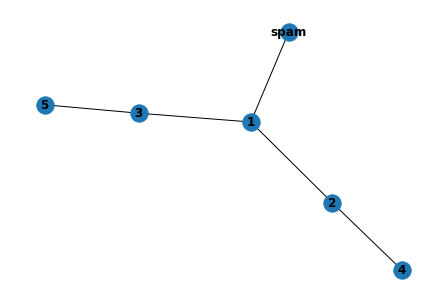

In [61]:
nx.draw(UG, with_labels=True, font_weight='bold')

## Graph properties

Graph properties are **set-like immutable views** of the nodes, edges, neighbors (adjacencies), degrees of nodes, neighbors of a node in a graph.

1. ```G.nodes(G: Graph) -> NodeView```
2. ```G.edges(G: Graph, nbunch=None) -> EdgeDataView```
3. ```G.adj -> AdjacencyView```
4. ```G.degree(G: Graph, nbunch=None, weight=None) -> DegreeView```
5. ```G.neighbors(node)```
6. ```G.number_of_nodes() -> int```: Number of nodes in the graph
7. ```G.number_of_edges() -> int```: Number of edges in the graph

Graph properties are also **Dict-like** that provides dictionary methods ```.items(), .data()```.

1. View.items()
2. View.data()


In [73]:
UG.number_of_nodes()

6

In [63]:
UG.number_of_edges()

5

### Neighbours

Graph ```adj``` property lists ```(node.key, node.neighbours)```.

In [90]:
for node_key, node_neighbours in UG.adj.items():
    print(f"node:{node_key:>5} -> neighbours: {node_neighbours}")

node:    1 -> neighbours: {2: {}, 3: {}, 'spam': {}}
node:    2 -> neighbours: {1: {}, 4: {}}
node:    3 -> neighbours: {1: {}, 5: {}}
node:    4 -> neighbours: {2: {}}
node:    5 -> neighbours: {3: {}}
node: spam -> neighbours: {1: {}}


## Node



In [64]:
UG.nodes()

NodeView((1, 2, 3, 4, 5, 'spam'))

In [78]:
[attr for attr in dir(UG.nodes) if not attr.startswith("_")]

['data', 'get', 'isdisjoint', 'items', 'keys', 'values']

In [67]:
for item in UG.nodes().items():
    print(item)

(1, {})
(2, {})
(3, {})
(4, {'color': 'red'})
(5, {'color': 'green'})
('spam', {'color': 'na'})


### Node attributes

```NodeView.get(key)``` method returns the attributres of the node identified by ```key```.

In [79]:
UG.nodes.keys()

KeysView(NodeView((1, 2, 3, 4, 5, 'spam')))

In [81]:
node_attributes = UG.nodes().get(4)
print(f"type {type(node_attributes)} : {node_attributes}")

type <class 'dict'> : {'color': 'red'}


### Node attributes via dictionary index

Because ```G.nodes``` is **dict-lie**, we can use ```G[index]``` to access the node attributes.

In [93]:
UG.nodes[4]

{'color': 'red'}

In [13]:
G.nodes["spam"]

{'color': 'na'}

In [44]:
G.nodes(data=True)

NodeDataView({0: {'label': 'A'}, 1: {'label': 'B'}, 2: {'label': 'C'}, 3: {'label': 'D'}, 4: {'label': 'E'}})

## Edge

In [68]:
UG.edges()

EdgeView([(1, 2), (1, 3), (1, 'spam'), (2, 4), (3, 5)])

In [97]:
for edge, attributes in UG.edges().items():
    print(f"edge:{edge[0]}->{edge[1]:>5}, attributes: {attributes}")

edge:1->    2, attributes: {}
edge:1->    3, attributes: {}
edge:1-> spam, attributes: {}
edge:2->    4, attributes: {}
edge:3->    5, attributes: {}


AdjacencyView({1: {2: {}, 3: {}, 'spam': {}}, 2: {1: {}, 4: {}}, 3: {1: {}, 5: {}}, 4: {2: {}}, 5: {3: {}}, 'spam': {1: {}}})

### Edge via subscript notation

```G[from, to]``` gives the edge ```(from, to)``` where **from** and **to** are node keys.




## Access node edges

In [14]:
G.edges([4, "spam"])

EdgeDataView([(4, 2), ('spam', 1)])

---
# Directed Graph

* [Directed graphs](https://networkx.org/documentation/stable/tutorial.html#directed-graphs)

In [15]:
edges = [
    ("sushi/0", "sushi/0", 0.7),
    ("sushi/0", "goes/1", 0.3), 
    ("sushi/0", "with/2", 0.1), 
    ("sushi/0", "wasabi/3", 0.6), 
    ("goes/1", "sushi/0", 0.1),
    ("goes/1", "goes/1", 0.75),
    ("goes/1", "with/2", 0.75),
    ("goes/1", "wasabi/3", 0.75),
    ("with/2", "sushi/0", 0.1),
    ("with/2", "goes/1", 0.75),
    ("with/2", "with/2", 0.75),
    ("with/2", "wasabi/3", 0.75),
    ("wasabi/3", "sushi/0", 0.1),
    ("wasabi/3", "goes/1", 0.75),
    ("wasabi/3", "with/2", 0.75),
    ("wasabi/3", "wasabi/3", 0.75),
]

DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)
#DG.out_degree(1, weight='weight')

In [16]:
list(nx.selfloop_edges(DG, data=True))

[('sushi/0', 'sushi/0', {'weight': 0.7}),
 ('goes/1', 'goes/1', {'weight': 0.75}),
 ('with/2', 'with/2', {'weight': 0.75}),
 ('wasabi/3', 'wasabi/3', {'weight': 0.75})]

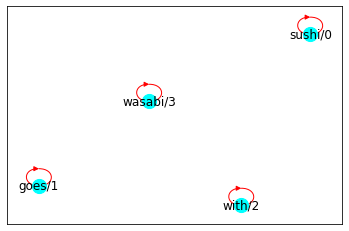

In [17]:
# DG.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
pos = nx.spring_layout(DG)
nx.draw_networkx_nodes(
    DG, 
    node_size=200,
    node_color="cyan",
    pos=pos
)
nx.draw_networkx_labels(
    DG,
    pos=pos
)
nx.draw_networkx_edges(
    DG, 
    edgelist=list(nx.selfloop_edges(DG, data=True)),
    edge_color="r",
    connectionstyle='arc3, rad = 0.1',
    pos=pos
)

{('sushi/0',
  'sushi/0'): Text(-0.03698019664518683, -0.006169481421862696, "{'weight': 0.7}"),
 ('sushi/0',
  'goes/1'): Text(-0.22365330086968593, 0.49606413147371486, "{'weight': 0.3}"),
 ('sushi/0',
  'with/2'): Text(0.367409834170549, 0.0008511278153537243, "{'weight': 0.1}"),
 ('sushi/0',
  'wasabi/3'): Text(-0.18073672994604986, -0.5030847407109313, "{'weight': 0.6}"),
 ('goes/1',
  'sushi/0'): Text(-0.22365330086968593, 0.49606413147371486, "{'weight': 0.1}"),
 ('goes/1',
  'goes/1'): Text(-0.41032640509418505, 0.9982977443692924, "{'weight': 0.75}"),
 ('goes/1',
  'with/2'): Text(0.1807367299460499, 0.5030847407109312, "{'weight': 0.75}"),
 ('goes/1',
  'wasabi/3'): Text(-0.36740983417054895, -0.0008511278153537916, "{'weight': 0.75}"),
 ('with/2',
  'sushi/0'): Text(0.367409834170549, 0.0008511278153537243, "{'weight': 0.1}"),
 ('with/2',
  'goes/1'): Text(0.1807367299460499, 0.5030847407109312, "{'weight': 0.75}"),
 ('with/2',
  'with/2'): Text(0.7717998649862848, 0.0078717

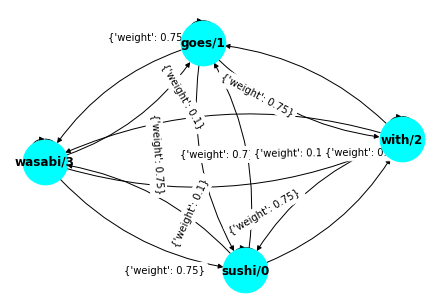

In [18]:
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
nx.draw(
    DG, 
    with_labels=True, 
    node_size=2000,
    node_color="cyan",
    font_weight='bold',
    font_size=12,
    edge_color='k',
    connectionstyle='arc3, rad = 0.2',
    pos=nx.spring_layout(G=DG, k=10.0),
    # pos=nx.circular_layout(DG),
    # pos=nx.kamada_kawai_layout(DG),
    # pos=nx.random_layout(DG),
    # pos=nx.shell_layout(DG),
)
nx.draw_networkx_edge_labels(
    DG, 
    #pos=nx.spring_layout(DG)
    pos=nx.kamada_kawai_layout(DG),
)

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

MDG = nx.MultiDiGraph()

# --------------------------------------------------------------------------------
# Self loop edges
# --------------------------------------------------------------------------------
self_loop_edges = [
    ("sushi/0", "sushi/0", ),
    ("goes/1", "goes/1"),
    ("with/2", "with/2"),
    ("wasabi/3", "wasabi/3"),
]
MDG.add_edges_from(
    self_loop_edges,
    edge_color='r',
    weight='length',
    length=100,
)

# --------------------------------------------------------------------------------
# Forward edges
# --------------------------------------------------------------------------------
forward_edges = [
    ("sushi/0", "goes/1"), 
    ("sushi/0", "with/2"), 
    ("sushi/0", "wasabi/3"), 
    ("goes/1", "with/2"),
    ("goes/1", "wasabi/3"),
    ("with/2", "wasabi/3"),
]
MDG.add_edges_from(
    forward_edges,
    edge_color='b',
    weight='length',
    length=100,
)

# --------------------------------------------------------------------------------
# Backward edges
# --------------------------------------------------------------------------------
backward_edges = [
    ("goes/1", "sushi/0"),
    ("with/2", "sushi/0"),
    ("with/2", "goes/1"),
    ("wasabi/3", "sushi/0"),
    ("wasabi/3", "goes/1"),
    ("wasabi/3", "with/2"),
]
MDG.add_edges_from(
    backward_edges,
    edge_color='g',
    weight='length',
    length=100,
)

[0, 0, 0, 0, 0, 0]

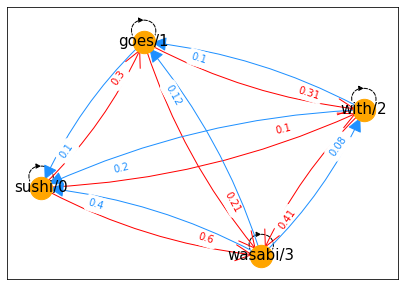

In [37]:
# layout definition must come after adding all nodes/edges. 
# Otherwise Node X has no position error.
pos=nx.spring_layout(MDG, seed=5, weight='length')
fig, ax = plt.subplots(figsize=(7, 5))

# --------------------------------------------------------------------------------
# Draw nodes & labels
# --------------------------------------------------------------------------------
nx.draw_networkx_nodes(
    MDG, 
    pos, 
    ax=ax,
    node_size=500,
    node_color="orange",
)
nx.draw_networkx_labels(
    MDG, 
    pos, 
    ax=ax,
    # font_weight='bold',
    font_size=15,
)

# --------------------------------------------------------------------------------
# Draw self loop edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG, 
    pos, 
    ax=ax, 
    edgelist=self_loop_edges, 
    edge_color="k",
    style="dashed",
    connectionstyle='arc3, rad=0.5',
)
nx.draw_networkx_edge_labels(
    MDG, 
    pos,
    label_pos=0.5,
    edge_labels={
        ("sushi/0", "sushi/0"): 0.7,
        ("goes/1", "goes/1"): 0.6,
        ("with/2", "with/2"): 0.62,
        ("wasabi/3", "wasabi/3"): 0.7,       
    },
    font_color='r'
)


# --------------------------------------------------------------------------------
# Draw forward edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG, 
    pos, 
    ax=ax, 
    edgelist=forward_edges, 
    edge_color="r",
    arrowsize=40,
    arrowstyle="->",
    connectionstyle='arc3, rad=0.1',
)
nx.draw_networkx_edge_labels(
    MDG, 
    pos,
    label_pos=0.25,
    edge_labels={
        ("sushi/0", "goes/1"): 0.3, 
        ("sushi/0", "with/2"): 0.1, 
        ("sushi/0", "wasabi/3"): 0.6, 
        ("goes/1", "with/2"): 0.31,
        ("goes/1", "wasabi/3"): 0.21,
        ("with/2", "wasabi/3"): 0.41,
    },
    font_color='r'
)

# --------------------------------------------------------------------------------
# Draw backward edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG, 
    pos, 
    ax=ax, 
    edgelist=backward_edges, 
    edge_color="dodgerblue",
    arrowsize=30,
    arrowstyle="-|>",
    connectionstyle='arc3, rad=0.1',
)
nx.draw_networkx_edge_labels(
    MDG, 
    pos,
    label_pos=0.25,
    edge_labels={
        ("goes/1", "sushi/0"): 0.1,
        ("with/2", "sushi/0"): 0.2,
        ("with/2", "goes/1"): 0.1,
        ("wasabi/3", "sushi/0"): 0.4,
        ("wasabi/3", "goes/1"): 0.12,
        ("wasabi/3", "with/2"): 0.08,
    },
    font_color='dodgerblue'
)
disable = """
nx.set_edge_attributes(
    G=MDG,
    values={
        ("goes/1", "sushi/0", 0.1): {"label": 0.1},
        ("with/2", "sushi/0", 0.2): {"label": 0.2},
        ("with/2", "goes/1", 0.1): {"label": 0.1},
        ("wasabi/3", "sushi/0", 0.4): {"label": 0.4},
        ("wasabi/3", "goes/1", 0.12): {"label": 0.12},
        ("wasabi/3", "with/2", 0.08): {"label": 0.08},
    }
)
"""

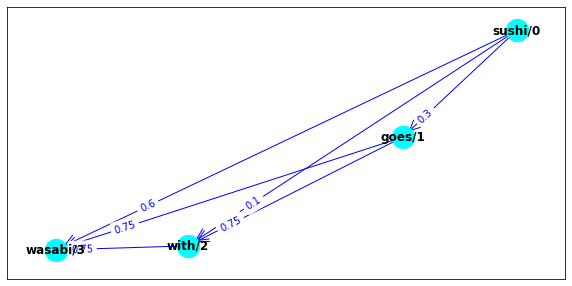

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

MDG = nx.MultiDiGraph()

# --------------------------------------------------------------------------------
# Forward edges
# --------------------------------------------------------------------------------
forward_edges = [
    ("sushi/0", "goes/1"), 
    ("sushi/0", "with/2"), 
    ("sushi/0", "wasabi/3"), 
    ("goes/1", "with/2"),
    ("goes/1", "wasabi/3"),
    ("with/2", "wasabi/3"),
]
MDG.add_edges_from(
    forward_edges,
    edge_color='b',
    weight='length',
    length=100,
)

# layout definition must come after adding all nodes/edges. 
# Otherwise Node X has no position error.
pos=nx.spring_layout(MDG, weight='length')
fig, ax = plt.subplots(figsize=(10, 5))

# --------------------------------------------------------------------------------
# Draw nodes & labels
# --------------------------------------------------------------------------------
nx.draw_networkx_nodes(
    MDG, 
    pos, 
    ax=ax,
    node_size=500,
    node_color="cyan",
)
nx.draw_networkx_labels(
    MDG, 
    pos, 
    ax=ax,
    font_weight='bold',
    font_size=12,
)

# --------------------------------------------------------------------------------
# Draw forward edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG, 
    pos, 
    ax=ax, 
    edgelist=forward_edges, 
    edge_color="b",
    arrowsize=30,
    arrowstyle="->",
#    connectionstyle='arc3, rad=0.25',
)
nx.draw_networkx_edge_labels(
    MDG, 
    pos,
    label_pos=0.2,
    edge_labels={
        ("sushi/0", "goes/1"): 0.3, 
        ("sushi/0", "with/2"): 0.1, 
        ("sushi/0", "wasabi/3"): 0.6, 
        ("goes/1", "with/2"): 0.75,
        ("goes/1", "wasabi/3"): 0.75,
        ("with/2", "wasabi/3"): 0.75,
    },
    font_color='b'
)
nx.set_edge_attributes(
    G=MDG,
    values={
        ("sushi/0", "goes/1", 0.1): {"label": 0.1},
        ("sushi/0", "with/2", 0.1): {"label": 0.2},
        ("sushi/0", "wasabi/3", 0.6): {"label": 0.6},
        ("goes/1", "with/2", 0.1): {"label": 0.1},
        ("goes/1", "wasabi/3", 0.75): {"label": 0.75},
        ("with/2", "wasabi/3", 0.75): {"label": 0.75},
    }
)

In [22]:
dir(pos)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [23]:
D = nx.drawing.nx_agraph.to_agraph(MDG)

# Modify node fillcolor and edge color.
D.node_attr.update(color='blue', style='filled', fillcolor='yellow')
D.edge_attr.update(color='blue', arrowsize=1)
pos = D.layout('dot')
D.draw('MDG.png')

In [24]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 

# define the graph as per your question
G=nx.MultiDiGraph([(1,2),(1,1),(1,2),(2,3),(3,4),(2,4), 
    (1,2),(1,2),(1,2),(2,3),(3,4),(2,4)])

# add graphviz layout options (see https://stackoverflow.com/a/39662097)
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}
                                                                                
# adding attributes to edges in multigraphs is more complicated but see
# https://stackoverflow.com/a/26694158                    
G[1][1][0]['color']='red'
                                                                                
A = to_agraph(G) 
A.layout('dot')                                                                 
A.draw('multi.png')   

In [25]:
import networkx as nx
import numpy as npy

A = npy.matrix([[2, 2, 7, 0, 0], [0, 2, 6, 3, 0], [0, 0, 0, 2, 1], [0, 0, 0, 0, 4],
                [4, 0, 0, 0, 0]])
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

# Set node labels to A, B, C, D, E
nx.set_node_attributes(G, {k: {'label': labels[k]} for k in labels.keys()})
nx.set_edge_attributes(G, {(e[0], e[1]): {'label': e[2]['weight']} for e in G.edges(data=True)})
D = nx.drawing.nx_agraph.to_agraph(G)

# Modify node fillcolor and edge color.
D.node_attr.update(color='blue', style='filled', fillcolor='yellow')
D.edge_attr.update(color='blue', arrowsize=1)
pos = D.layout('dot')
D.draw('Graph.png')

In [26]:
{(e[0], e[1]): {'label': e[2]['weight']} for e in G.edges(data=True)}

{(0, 0): {'label': 2},
 (0, 1): {'label': 2},
 (0, 2): {'label': 7},
 (1, 1): {'label': 2},
 (1, 2): {'label': 6},
 (1, 3): {'label': 3},
 (2, 3): {'label': 2},
 (2, 4): {'label': 1},
 (3, 4): {'label': 4},
 (4, 0): {'label': 4}}

{((('sushi/0', 0.1), ('goes/1', 0.6), ('with/2', 0.31), ('wasabi/3', 0.21)),
  (('sushi/0', 0.7),
   ('goes/1', 0.3),
   ('with/2', 0.1),
   ('wasabi/3', 0.6))): Text(0.023231749704253818, -0.8407610856183108, '0.1'),
 ((('sushi/0', 0.2), ('goes/1', 0.1), ('with/2', 0.62), ('wasabi/3', 0.41)),
  (('sushi/0', 0.7),
   ('goes/1', 0.3),
   ('with/2', 0.1),
   ('wasabi/3', 0.6))): Text(0.18185255513883086, -0.49999917725309173, '0.2'),
 ((('sushi/0', 0.2), ('goes/1', 0.1), ('with/2', 0.62), ('wasabi/3', 0.41)),
  (('sushi/0', 0.1),
   ('goes/1', 0.6),
   ('with/2', 0.31),
   ('wasabi/3', 0.21))): Text(-0.8395681250569225, -0.0222857250956571, '0.1'),
 ((('sushi/0', 0.4), ('goes/1', 0.12), ('with/2', 0.08), ('wasabi/3', 0.7)),
  (('sushi/0', 0.7),
   ('goes/1', 0.3),
   ('with/2', 0.1),
   ('wasabi/3', 0.6))): Text(0.5223263146959254, -0.6592375431368412, '0.4'),
 ((('sushi/0', 0.4), ('goes/1', 0.12), ('with/2', 0.08), ('wasabi/3', 0.7)),
  (('sushi/0', 0.1),
   ('goes/1', 0.6),
   ('with/2

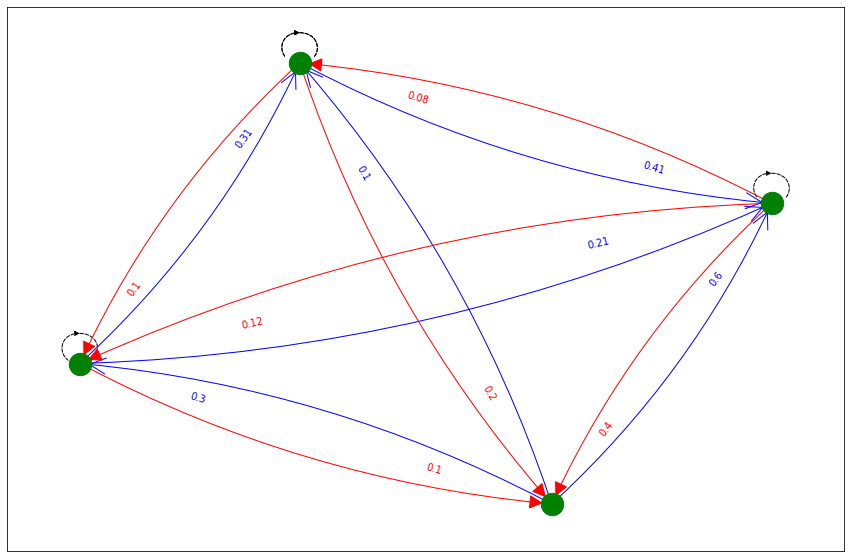

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

MDG = nx.MultiDiGraph()


v0 = (("sushi/0", 0.7), ("goes/1", 0.3), ("with/2", 0.1), ("wasabi/3", 0.6))
v1 =  (("sushi/0", 0.1), ("goes/1", 0.6), ("with/2", 0.31), ("wasabi/3", 0.21))
v2 = (("sushi/0", 0.2), ("goes/1", 0.1), ("with/2", 0.62), ("wasabi/3", 0.41))
v3 = (("sushi/0", 0.4), ("goes/1", 0.12), ("with/2", 0.08), ("wasabi/3", 0.7))

# --------------------------------------------------------------------------------
# Self loop edges
# --------------------------------------------------------------------------------
self_loop_edges = [
    (v1, v1),
    (v2,v2),
    (v2, v2),
    (v3, v3),
]
MDG.add_edges_from(
    self_loop_edges,
    edge_color='r',
    weight='length',
    length=100,
)

# --------------------------------------------------------------------------------
# Forward edges
# --------------------------------------------------------------------------------
forward_edges = [
    (v0, v1), 
    (v0, v2), 
    (v0, v3), 
    (v1, v2),
    (v1, v3),
    (v2, v3),
]
MDG.add_edges_from(
    forward_edges,
    edge_color='b',
    weight='length',
    length=100,
)

# --------------------------------------------------------------------------------
# Backward edges
# --------------------------------------------------------------------------------
backward_edges = [
    (v1, v0),
    (v2, v0),
    (v2, v1),
    (v3, v0),
    (v3, v1),
    (v3, v2),
]
MDG.add_edges_from(
    backward_edges,
    edge_color='g',
    weight='length',
    length=100,
)



# layout definition must come after adding all nodes/edges.
# Otherwise Node X has no position error.
pos=nx.spring_layout(MDG, seed=5, weight='length')
fig, ax = plt.subplots(figsize=(15, 10))

# --------------------------------------------------------------------------------
# Draw nodes & labels
# --------------------------------------------------------------------------------
nx.draw_networkx_nodes(
    MDG,
    pos,
    ax=ax,
    node_size=500,
    node_color="green",
)
"""
nx.draw_networkx_labels(
    MDG,
    pos,
    ax=ax,
    # font_weight='bold',
    font_size=15,
)
"""
# --------------------------------------------------------------------------------
# Draw self loop edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG,
    pos,
    ax=ax,
    edgelist=self_loop_edges,
    edge_color="k",
    style="dashed",
    connectionstyle='arc3, rad=0.5',
)
nx.draw_networkx_edge_labels(
    MDG,
    pos,
    label_pos=0.5,
    edge_labels={
        (v0, v0): 0.33,
        (v1, v1): 0.6,
        (v2, v2): 0.62,
        (v3, v3): 0.33,
    },
    font_color='r'
)


# --------------------------------------------------------------------------------
# Draw forward edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG,
    pos,
    ax=ax,
    edgelist=forward_edges,
    edge_color="b",
    arrowsize=40,
    arrowstyle="->",
    connectionstyle='arc3, rad=0.1',
)
nx.draw_networkx_edge_labels(
    MDG,
    pos,
    label_pos=0.25,
    edge_labels={
        (v0, v1): 0.3,
        (v0, v2): 0.1,
        (v0, v3): 0.6,
        (v1, v2): 0.31,
        (v1, v3): 0.21,
        (v2, v3): 0.41,
    },
    font_color='b'
)

# --------------------------------------------------------------------------------
# Draw backward edges
# --------------------------------------------------------------------------------
nx.draw_networkx_edges(
    MDG,
    pos,
    ax=ax,
    edgelist=backward_edges,
    edge_color="r",
    arrowsize=30,
    arrowstyle="-|>",
    connectionstyle='arc3, rad=0.1',
)
nx.draw_networkx_edge_labels(
    MDG,
    pos,
    label_pos=0.25,
    edge_labels={
        (v1, v0): 0.1,
        (v2, v0): 0.2,
        (v2, v1): 0.1,
        (v3, v0): 0.4,
        (v3, v1): 0.12,
        (v3, v2): 0.08,
    },
    font_color='r'
)
